Problem 5 : Implementation
=============

KL-Divergence
-----------

In [26]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader

# torchvision: popular datasets, model architectures, and common image transformations for computer vision.
from torchvision import datasets
from torchvision.transforms import transforms

from random import randint
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt


'''
Step 1: Prepare dataset
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1

'''
Step 2: Define the neural network class
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=True)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer.
'''
model = LR()                                   # Define a Neural Network Model

def logistic_loss(output, target):
    return -torch.nn.functional.logsigmoid(target*output)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)   # specify SGD with learning rate

'''
Step 4: Train model with SGD
'''
losses = []
for _ in range(1000) :
    # Sample a random data for training
    ind = randint(0, len(train_set.data)-1)
    image, label = train_set.data[ind], train_set.targets[ind]

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()
    losses.append(train_loss.item())
    #(This syntax will make more sense once we learn about minibatches)

    # perform SGD step (parameter update)
    optimizer.step()
'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Evaluate accuracy using test data
for ind in range(len(test_set.data)) :

    image, label = test_set.data[ind], test_set.targets[ind]

    # evaluate model
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_set.data), correct, len(test_set.data),
        100. * correct / len(test_set.data)))


[Test set] Average loss: 7.9708, Accuracy: 1873/1991 (94.07%)



MSE
----

In [24]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader

# torchvision: popular datasets, model architectures, and common image transformations for computer vision.
from torchvision import datasets
from torchvision.transforms import transforms

from random import randint
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt


'''
Step 1: Prepare dataset
'''
# Use data with only 4 and 9 as labels: which is hardest to classify
label_1, label_2 = 4, 9

# MNIST training data
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)

# Use data with two labels
idx = (train_set.targets == label_1) + (train_set.targets == label_2)
train_set.data = train_set.data[idx]
train_set.targets = train_set.targets[idx]
train_set.targets[train_set.targets == label_1] = -1
train_set.targets[train_set.targets == label_2] = 1

# MNIST testing data
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

# Use data with two labels
idx = (test_set.targets == label_1) + (test_set.targets == label_2)
test_set.data = test_set.data[idx]
test_set.targets = test_set.targets[idx]
test_set.targets[test_set.targets == label_1] = -1
test_set.targets[test_set.targets == label_2] = 1

'''
Step 2: Define the neural network class
'''
class LR(nn.Module) :
    '''
    Initialize model
        input_dim : dimension of given input data
    '''
    # MNIST data is 28x28 images
    def __init__(self, input_dim=28*28) :
        super().__init__()
        self.linear = nn.Linear(input_dim, 1, bias=True)

    ''' forward given input x '''
    def forward(self, x) :
        return self.linear(x.float().view(-1, 28*28))

'''
Step 3: Create the model, specify loss function and optimizer.
'''
model = LR()                                   # Define a Neural Network Model

def loss(target,output):
    return 0.5*(1-output)*((1-torch.sigmoid(-target))**2 + torch.sigmoid(target))+0.5*(1+output)*((torch.sigmoid(-target))**2+(1-torch.sigmoid(target))**2)

loss_function = logistic_loss                                                   # Specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)   # specify SGD with learning rate

'''
Step 4: Train model with SGD
'''
losses = []
for _ in range(1000) :
    # Sample a random data for training
    ind = randint(0, len(train_set.data)-1)
    image, label = train_set.data[ind], train_set.targets[ind]

    # Clear previously computed gradient
    optimizer.zero_grad()

    # then compute gradient with forward and backward passes
    train_loss = loss_function(model(image), label.float())
    train_loss.backward()
    losses.append(train_loss.item())
    #(This syntax will make more sense once we learn about minibatches)

    # perform SGD step (parameter update)
    optimizer.step()
'''
Step 5: Test model (Evaluate the accuracy)
'''
test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

# Evaluate accuracy using test data
for ind in range(len(test_set.data)) :

    image, label = test_set.data[ind], test_set.targets[ind]

    # evaluate model
    output = model(image)

    # Calculate cumulative loss
    test_loss += loss_function(output, label.float()).item()

    # Make a prediction
    if output.item() * label.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

# Print out the results
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(test_set.data), correct, len(test_set.data),
        100. * correct / len(test_set.data)))


[Test set] Average loss: 7.2848, Accuracy: 1861/1991 (93.47%)



Problem 7 : Implementation

Total number of trainable parameters: 60806
0th epoch starting.
1th epoch starting.
2th epoch starting.
3th epoch starting.
4th epoch starting.
5th epoch starting.
6th epoch starting.
7th epoch starting.
8th epoch starting.
9th epoch starting.
Time ellapsed in training is: 607.5850279331207
[Test set] Average loss: 0.0230, Accuracy: 1201/10000 (12.01%)



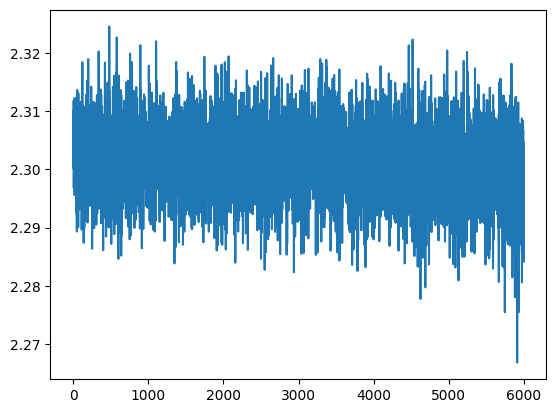

In [23]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

'''
Step 1:
'''

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False, 
                              transform=transforms.ToTensor())


'''
Step 2: LeNet5
'''

# Modern LeNet uses this layer for C3
class C3_layer_full(nn.Module):
    def __init__(self):
        super(C3_layer_full, self).__init__()
        self.conv_layer = nn.Conv2d(6, 16, kernel_size=5)

    def forward(self, x):
        return self.conv_layer(x)

# Original LeNet uses this layer for C3
class C3_layer(nn.Module):
    def __init__(self):
        super(C3_layer, self).__init__()
        self.ch_in_3 = [[0, 1, 2],
                        [1, 2, 3],
                        [2, 3, 4],
                        [3, 4, 5],
                        [0, 4, 5],
                        [0, 1, 5]] # filter with 3 subset of input channels
        self.ch_in_4 = [[0, 1, 2, 3],
                        [1, 2, 3, 4],
                        [2, 3, 4, 5],
                        [0, 3, 4, 5],
                        [0, 1, 4, 5],
                        [0, 1, 2, 5],
                        [0, 1, 3, 4],
                        [1, 2, 4, 5],
                        [0, 2, 3, 5]] # filter with 4 subset of input channels
        # put implementation here
        self.linear = nn.ModuleList()
        for _ in range(6):
            self.linear.append(nn.Conv2d(in_channels=3, out_channels=1,kernel_size=(5,5)))
        for _ in range(9):
            self.linear.append(nn.Conv2d(in_channels=4, out_channels=1,kernel_size=(5,5)))
        self.linear.append(nn.Conv2d(in_channels=6, out_channels=1, kernel_size=(5,5)))
    def forward(self, x):
        # put implementation here
        output = torch.tensor([])
        for i in range(16):
            layer = self.linear[i]
            if i < 6:
                inputs = x[:,self.ch_in_3[i],:,:]
            elif i>=6 and i<15:
                inputs = x[:,self.ch_in_4[i-6],:,:]
            else:
                inputs = x
            output = torch.cat([output, layer(inputs)])
        return output
    
class LeNet(nn.Module) :
    def __init__(self) :
        super(LeNet, self).__init__()
        #padding=2 makes 28x28 image into 32x32
        self.C1_layer = nn.Sequential(
                nn.Conv2d(1, 6, kernel_size=5, padding=2),
                nn.Tanh()
                )
        self.P2_layer = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.C3_layer = nn.Sequential(
                # C3_layer_full(),
                C3_layer(),
                nn.Tanh()
                )
        self.P4_layer = nn.Sequential(
                nn.AvgPool2d(kernel_size=2, stride=2),
                nn.Tanh()
                )
        self.C5_layer = nn.Sequential(
                nn.Linear(5*5*16, 120),
                nn.Tanh()
                )
        self.F6_layer = nn.Sequential(
                nn.Linear(120, 84),
                nn.Tanh()
                )
        self.F7_layer = nn.Linear(84, 10)
        self.tanh = nn.Tanh()
        
    def forward(self, x) :
        output = self.C1_layer(x)
        output = self.P2_layer(output)
        output = self.C3_layer(output)
        output = self.P4_layer(output)
        output = output.view(-1,5*5*16)
        output = self.C5_layer(output)
        output = self.F6_layer(output)
        output = self.F7_layer(output)
        return output

    
'''
Step 3
'''
model = LeNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# print total number of trainable parameters
param_ct = sum([p.numel() for p in model.parameters()])
print(f"Total number of trainable parameters: {param_ct}")

'''
Step 4
'''
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
losses = []
import time
start = time.time()
for epoch in range(10) :
    print("{}th epoch starting.".format(epoch))
    for images, labels in train_loader :
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        train_loss = loss_function(model(images), labels)
        losses.append(train_loss.item())
        train_loss.backward()

        optimizer.step()
end = time.time()
print("Time ellapsed in training is: {}".format(end - start))

plt.plot(range(6000),losses)


'''
Step 5
'''
test_loss, correct, total = 0, 0, 0

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

for images, labels in test_loader :
    images, labels = images.to(device), labels.to(device)

    output = model(images)
    test_loss += loss_function(output, labels).item()

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    
    total += labels.size(0)
            
print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /total, correct, total,
        100. * correct / total))
 